# Introduction
### Overview
Customer Lifecycle is a framework to group and label customers based on their value in our platform. The main material to this Lifecycle is Recency and Frequency of the customers.

### Objective 
1. See Customer Lifecycle Proportions and Trends 
2. Find out Lifecycle movement in month to month
3. Deep Dive in Champions Lifecycle 
    a. Movement proportion
    b. Feature importance
    c. Predictions
    
### Approach
1. Data understanding
2. Data preprocessing
3. Exploratory data analysis 
4. Data Modelling



#### Link to Gslides : https://docs.google.com/presentation/d/1SLjPZW4P9wrS8w1Ur5ec-QSxsELWBvdso-38DNgu1GQ/edit?usp=sharing


# Importing Data

In [210]:
from google.cloud import bigquery
import seaborn as sns
import numpy as np
import pandas as pd
import joblib 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
project_id = 'tvlk-data-mktanalytics-dev'
client = bigquery.Client(project=project_id)


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [7]:
query = '''
select * 
from `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle` 
'''

df = client.query(query).to_dataframe()

In [3]:
# joblib.dump(df, 'customer_df.pkl')
df = joblib.load('customer_df.pkl')

# Data Understanding

### Data Overview

In [14]:
df.head().transpose()

,0,1,2,3,4
row_num,343313,748191,778371,488453,553369
profile_id,329825,320465,320465,497377,320465
last_ads_id,None,None,None,None,None
snapshot_month,2014-12-01,2015-06-01,2014-12-01,2015-04-01,2014-08-01
churn_cut_off,0,24,0,0,0
first_issued_month,2013-06-01,2013-06-01,2013-06-01,2013-06-01,2013-06-01
last_issued_month,2013-08-01,2013-06-01,2013-06-01,2013-08-01,2013-06-01
lifecycle,09. at risk,09. at risk,09. at risk,09. at risk,09. at risk
bucket_gbv_usd_all,1,1,1,1,1
bucket_issued_1y,1,1,1,1,1


1. Data variables consist of customer feature based on their behaviour, such as purchase, visit, search, register, etc.
2. Other feature is customer lifecycle and segmentation (bucket) which represents customer value in Traveloka


### Check Null Variables

In [195]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
selling_points,1672331,1.000000
burnt_external_points,1672331,1.000000
burnt_internal_points,1672331,1.000000
earned_points,1672331,1.000000
burnt_external_points_all,1672331,1.000000
burnt_internal_points_all,1672331,1.000000
earned_points_all,1672331,1.000000
selling_points_all,1672331,1.000000
last_ads_id,1347203,0.805584
coupon_usage_usd_all,406310,0.242960


1. From above data, we can drop some unnecassary columns due contains all null variables (points related)
2. In this analysis we just focus only on Customers , so null variable related to users also will dropped.


### Drop null variables and select neccessary variables (Focus On customers, drop users)

In [25]:
df.columns

Index(['row_num', 'profile_id', 'last_ads_id', 'snapshot_month',
       'churn_cut_off', 'first_issued_month', 'last_issued_month', 'lifecycle',
       'bucket_gbv_usd_all', 'bucket_issued_1y', 'bucket_visit_1y',
       'bucket_search_1y', 'bucket_gbv_1y', 'bucket_netrev_1y',
       'bucket_coupon_1y', 'visit_count_all', 'search_count_all',
       'issued_count_all', 'gbv_usd_all', 'net_revenue_usd_all',
       'coupon_usage_usd_all', 'burnt_external_points_all',
       'burnt_internal_points_all', 'earned_points_all', 'selling_points_all',
       'country', 'is_registered', 'is_subscribed', 'issued_count',
       'sum_gbv_usd', 'net_revenue_usd', 'search_count', 'visit_count',
       'coupon_usage_usd', 'earned_points', 'burnt_internal_points',
       'burnt_external_points', 'selling_points', 'is_customer', 'is_churn',
       'product', 'product_breadth'],
      dtype='object')

In [5]:
null_columns = ['burnt_external_points_all', 'burnt_internal_points_all', 'earned_points_all', 'selling_points_all', 'earned_points', 'burnt_internal_points',
       'burnt_external_points', 'selling_points', 'last_ads_id']
df_clean = df.drop(null_columns, axis = 1).dropna()

In [200]:
hold = ['profile_id', 'first_issued_month', 'last_issued_month']
categoric = ['lifecycle',
       'bucket_gbv_usd_all', 'bucket_issued_1y', 'bucket_visit_1y',
       'bucket_search_1y', 'bucket_gbv_1y', 'bucket_netrev_1y',
       'bucket_coupon_1y', 
       'country', 'is_registered', 'is_subscribed', 'is_customer', 'is_churn',
       'product', 'product_breadth']

numeric = ['visit_count_all', 'search_count_all',
       'issued_count_all', 'gbv_usd_all', 'net_revenue_usd_all',
       'coupon_usage_usd_all', 
        'issued_count',
       'sum_gbv_usd', 'net_revenue_usd', 'search_count', 'visit_count',
       'coupon_usage_usd']

### Select Latest Snapshot month for EDA

In [201]:
df_clean.snapshot_month = pd.to_datetime(df_clean.snapshot_month)
df_latest = df_clean[df_clean['snapshot_month'] == pd.to_datetime('2015-12-01') ]

In [202]:
df_categoric = df_latest[categoric]
df_numeric = df_latest[numeric]

### See the basic stats Data

In [203]:
for column in df_numeric.columns:
    df_numeric[column] = df_numeric[column].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [204]:
df_numeric['coupon_usage_usd_all'] = np.abs(df_numeric['coupon_usage_usd_all'])
df_numeric['coupon_usage_usd'] = np.abs(df_numeric['coupon_usage_usd'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [206]:
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
visit_count_all,124422.0,20.185498,80.127855,1.0,1.0,4.0,13.0,8804.0
search_count_all,124422.0,28.719439,126.224888,1.0,1.0,4.0,18.0,10450.0
issued_count_all,124422.0,4.473220,11.926602,1.0,1.0,2.0,4.0,1256.0
gbv_usd_all,124422.0,384.404993,1145.685424,0.0,65.0,155.0,379.0,173022.0
net_revenue_usd_all,124422.0,7.315338,40.673341,-5908.0,0.0,3.0,9.0,3704.0
coupon_usage_usd_all,124422.0,2.200833,20.119411,0.0,0.0,0.0,0.0,3396.0
issued_count,124422.0,0.465135,1.238627,0.0,0.0,0.0,0.0,65.0
sum_gbv_usd,124422.0,44.538675,159.387164,0.0,0.0,0.0,0.0,7815.0
net_revenue_usd,124422.0,0.683730,6.071380,-163.0,0.0,0.0,0.0,329.0
search_count,124422.0,5.384892,49.454030,0.0,0.0,0.0,1.0,10404.0


1. Range between variables are varies, so we need to standardise for prediction purpose
2. Lot of customers didn’t have activities in current month (visit, issuance, search)


# Exploratory Data Analysis

### Categorical Variable Visualisation on latest snapshot month

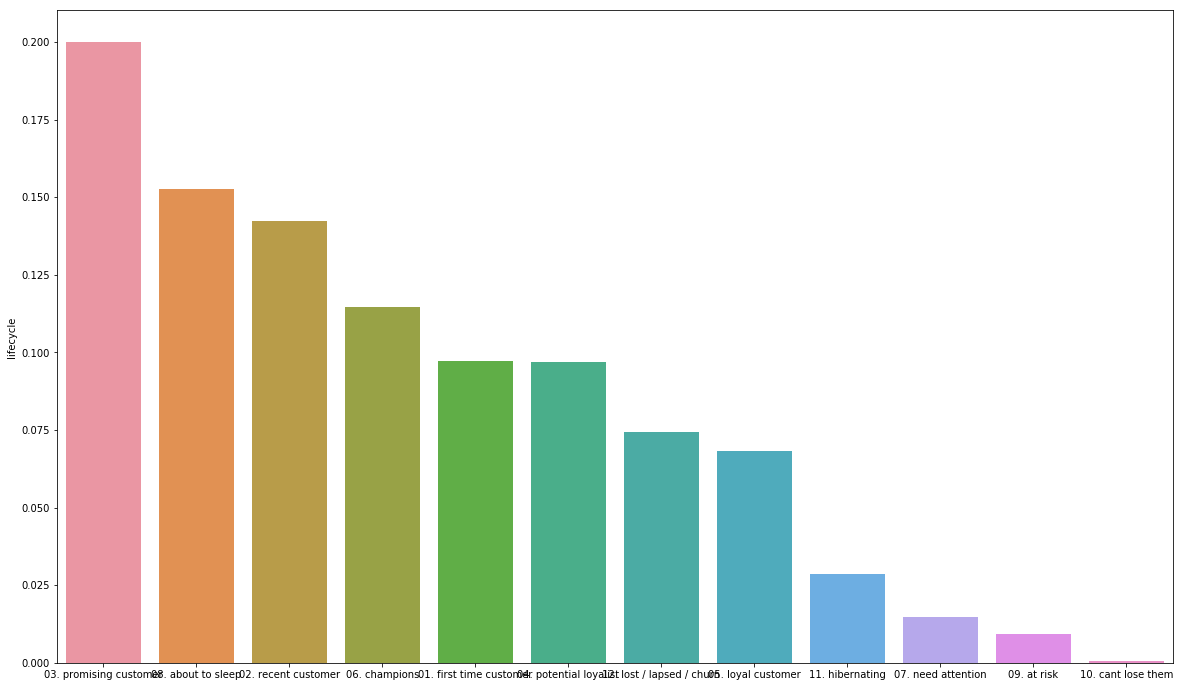

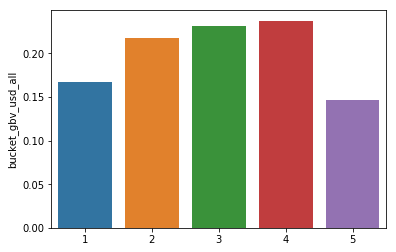

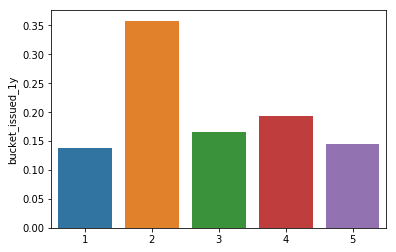

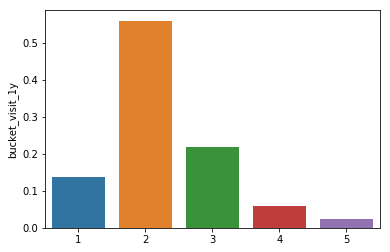

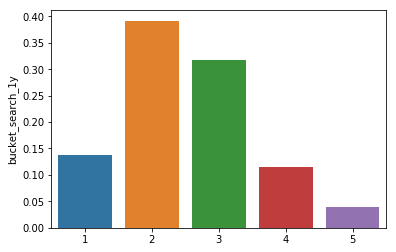

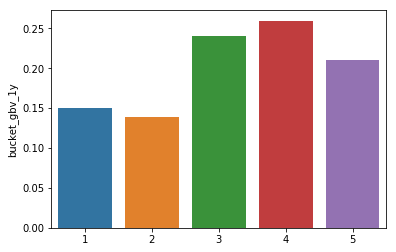

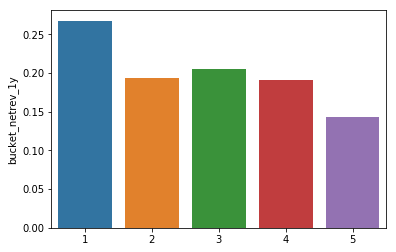

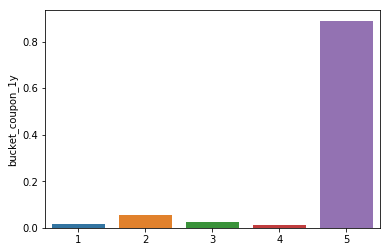

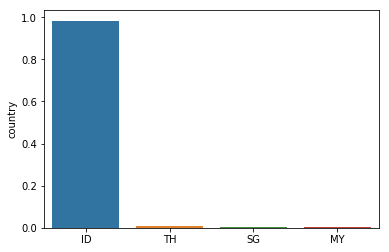

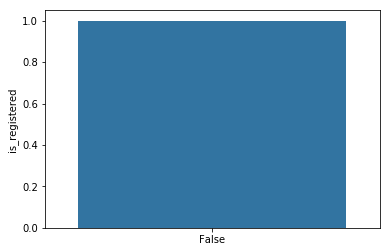

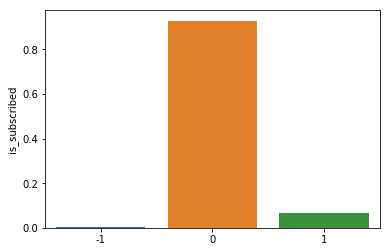

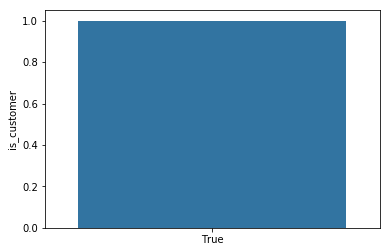

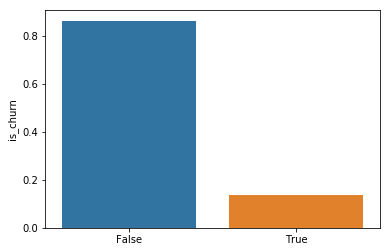

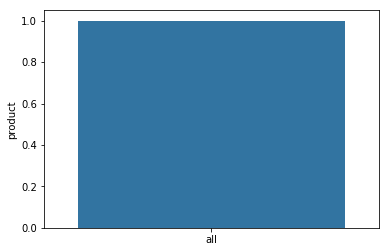

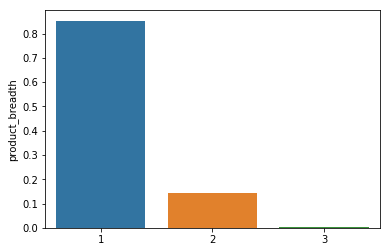

In [81]:
plt.figure(figsize = (20,12))

for column in df_categoric.columns:
    sns.barplot(x=df_categoric[column].value_counts().index,
                 y=df_categoric[column].value_counts(normalize = True))
    plt.show()

1. From above chart, we can drop some variables due contains only one value such as : product, is_customer, is_registered
2. Some of data are not balance between one and another
3. Most of customers come from ID 
4. Product breadth of customers mostly only 1

In [82]:
drop_categoric = ['product', 'is_customer', 'is_registered']
df_categoric_clean = df_categoric.drop(drop_categoric, axis = 1)

In [83]:
size = df_categoric['lifecycle'].value_counts(normalize = True)
names = df_categoric['lifecycle'].value_counts().index
my_circle=plt.Circle( (0,0), 0.5, color='white')

### Numerical Variable Visualisation on latest snapshot month

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Median: 4.0
Mean: 20.185497741556958
Std Dev: 80.12785536619128


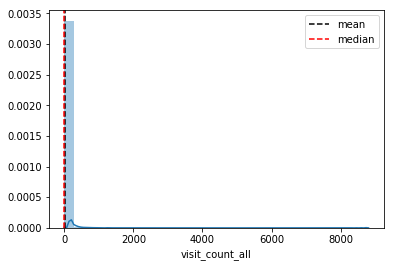

Median: 4.0
Mean: 28.719438684477023
Std Dev: 126.22488750907547


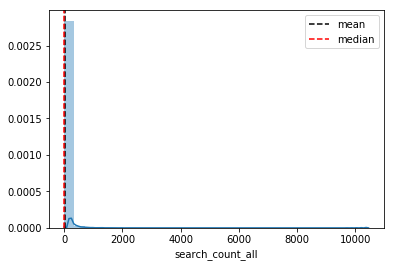

Median: 2.0
Mean: 4.473220170066387
Std Dev: 11.926602014126576


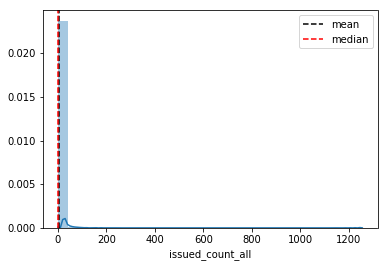

Median: 155.0
Mean: 384.4049926861809
Std Dev: 1145.685424372559


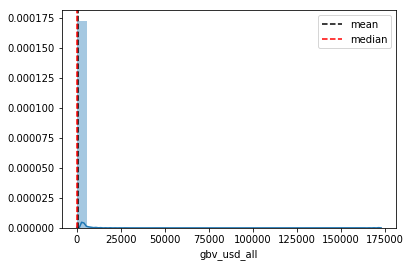

Median: 3.0
Mean: 7.315338123482985
Std Dev: 40.673341480452336


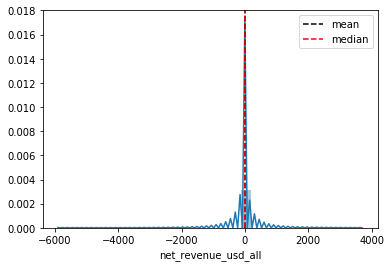

Median: 0.0
Mean: 2.2008326501744064
Std Dev: 20.11941060753163


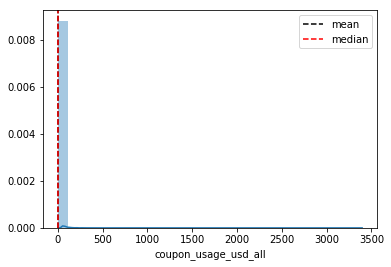

Median: 0.0
Mean: 0.4651347832376911
Std Dev: 1.238626834606082


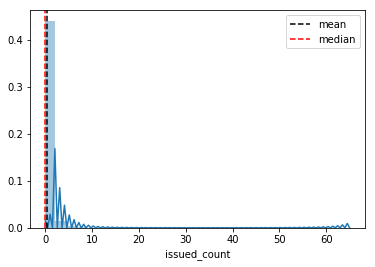

Median: 0.0
Mean: 44.53867483242514
Std Dev: 159.38716421685913


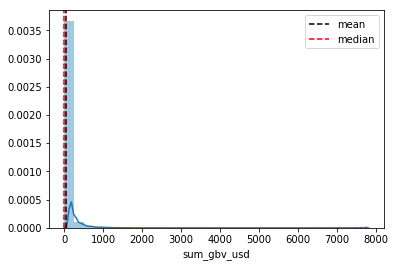

Median: 0.0
Mean: 0.6837295655109225
Std Dev: 6.071379637538424


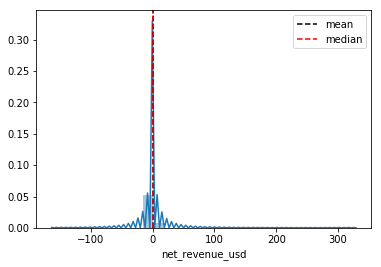

Median: 0.0
Mean: 5.384891739403
Std Dev: 49.45402954832472


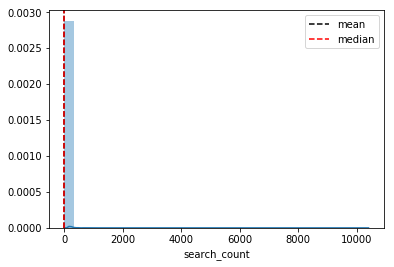

Median: 0.0
Mean: 1.86028998087155
Std Dev: 6.748701182900521


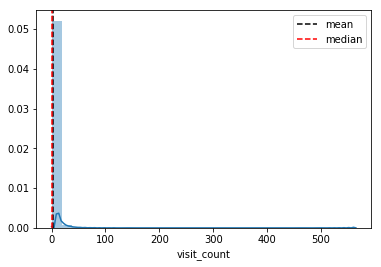

Median: 0.0
Mean: 0.36866470559868836
Std Dev: 3.195732789734319


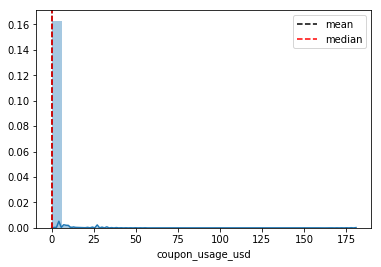

In [84]:
for column in df_numeric.columns:
    x = df_numeric[column]
    sns.distplot(x, axlabel=x.name, bins = 30)
    line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
    line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
    first_legend = plt.legend(handles=[line1,line2], loc=1)
    print("Median:", x.median())
    print("Mean:", x.mean())
    print("Std Dev:", x.std())
    plt.show()

We can't really see the distribution pattern in the numerical variables since most of them are really right skewed. so we decided to take *log transform* each of them and exclude *0 value*

In [85]:
df_numeric_log = pd.DataFrame()

for column in df_numeric.columns:
    df_numeric_log[column] = np.log(1+df_numeric[column])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [86]:
df_numeric_log = df_numeric_log.drop(['net_revenue_usd_all', 'net_revenue_usd'], axis =1)

Median: 1.6094379124341003
Mean: 1.905653317875858
Std Dev: 1.2482874411514389


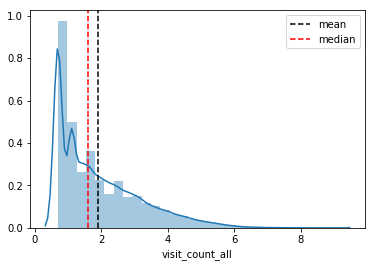

Median: 1.6094379124341003
Mean: 2.020441230028464
Std Dev: 1.4101573567009913


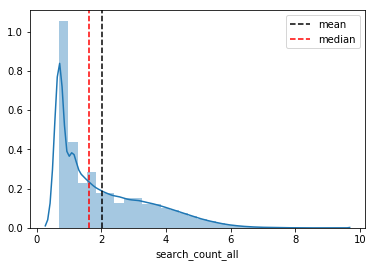

Median: 1.0986122886681098
Mean: 1.2981460750331257
Std Dev: 0.7280595602580662


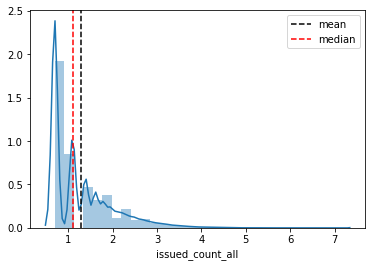

Median: 5.14166355650266
Mean: 5.225392757867978
Std Dev: 1.1572386224063598


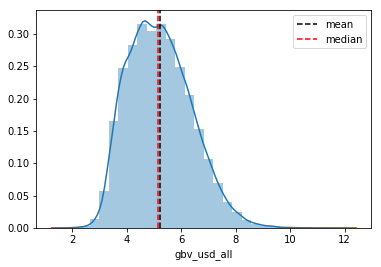

Median: 2.1972245773362196
Mean: 2.3919837679519107
Std Dev: 0.8756096159270135


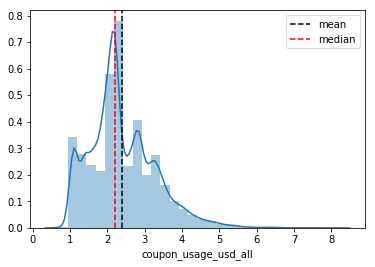

Median: 0.6931471805599453
Mean: 0.9559744107452888
Std Dev: 0.39216560200209055


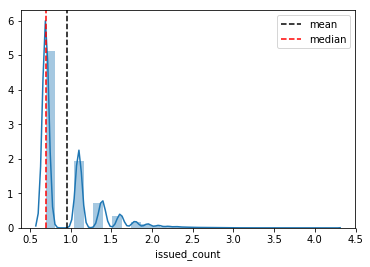

Median: 4.59511985013459
Mean: 4.691935427552352
Std Dev: 0.9413762728176726


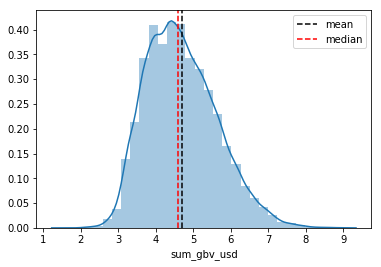

Median: 1.3862943611198906
Mean: 1.8471784886610316
Std Dev: 1.2219679555299812


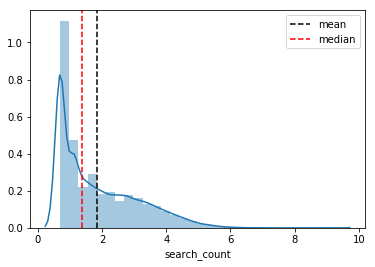

Median: 1.0986122886681098
Mean: 1.412220168683871
Std Dev: 0.8017083708830605


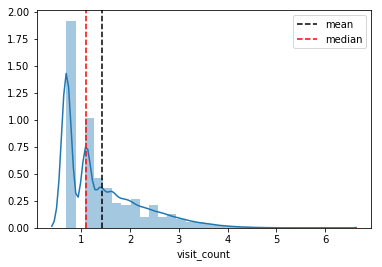

Median: 2.1972245773362196
Mean: 2.3427016291662084
Std Dev: 0.737366324891964


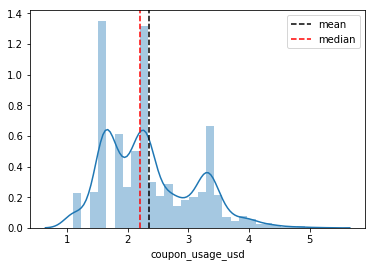

In [87]:
for column in df_numeric_log.columns:
    x = df_numeric_log[df_numeric_log[column] != 0][column]
    sns.distplot(x, axlabel=x.name, bins = 30)
    line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
    line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
    first_legend = plt.legend(handles=[line1,line2], loc=1)
    print("Median:", x.median())
    print("Mean:", x.mean())
    print("Std Dev:", x.std())
    plt.show()

1. Even after transformed to Log version, most of the distributions still right skewed
2. Only GBV close to bell curve (normal distribution)


### Customer Lifecycle Exploration

In [95]:
df_lifecycle = df_clean[['snapshot_month', 'lifecycle', 'profile_id']]
df_lifecycle_limit = df_lifecycle[pd.to_datetime(df_lifecycle['snapshot_month']) >= pd.to_datetime('2015-01-01')]

In [148]:
df_lifecycle_grouped = df_lifecycle_limit.groupby(['snapshot_month', 'lifecycle'], as_index= False).agg({ 'profile_id' : pd.Series.nunique
                                                          })
df_lifecycle_grouped.columns = ['snapshot_month', 'lifecycle', 'total_pid']
df_lifecycle_grouped.head(12)

,snapshot_month,lifecycle,total_pid
0,2015-01-01,01. first time customer,7860
1,2015-01-01,02. recent customer,8299
2,2015-01-01,03. promising customer,11265
3,2015-01-01,04. potential loyalist,3945
4,2015-01-01,05. loyal customer,1441
5,2015-01-01,06. champions,4347
6,2015-01-01,07. need attention,350
7,2015-01-01,08. about to sleep,5274
8,2015-01-01,09. at risk,103
9,2015-01-01,10. cant lose them,3


In [153]:
df_livecycle_pivot = df_lifecycle_grouped.pivot(index='snapshot_month', columns='lifecycle', values='total_pid')

In [163]:
df_livecycle_pivot['snapshot_month'] = df_livecycle_pivot['snapshot_month'].astype(str)
df_livecycle_pivot['month'] = df_livecycle_pivot['snapshot_month'].str[5:7]
df_livecycle_pivot = df_livecycle_pivot.drop(['snapshot_month'], axis = 1)

#### Customer Lifecycle Trends Last 1 year data (2015)

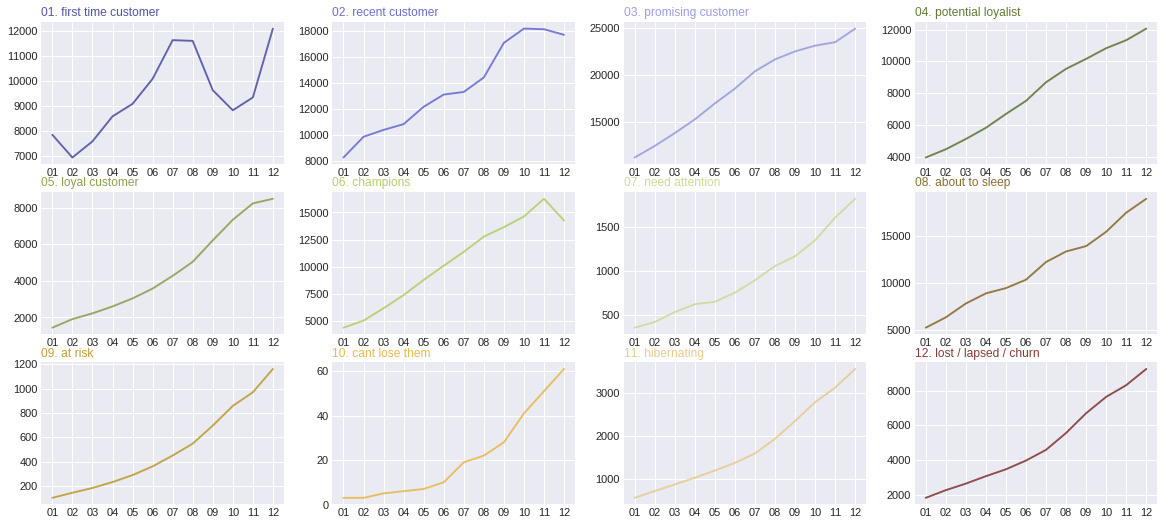

In [187]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (20,12))


# create a color palette
palette = plt.get_cmap('tab20b')

 
# multiple line plot
num=0
for column in df_livecycle_pivot.drop('month', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,4, num)
 
    # Plot the lineplot
    plt.plot(df_livecycle_pivot['month'], df_livecycle_pivot[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 


1. Almost all of lifecycle trends are increasing
2. First time customer trends are quite fluctuate, if we see the data this most likely because of data loss and unlikely seasonality

#### Customer Lifecycle Movement

In [96]:
df_lifecycle_limit['month'] = df_lifecycle_limit['snapshot_month'].astype('str').str[5:7]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
df_lifecycle_7 =  df_lifecycle_limit[df_lifecycle_limit['month'] == '07'].drop(['snapshot_month', 'month'], axis = 1)
df_lifecycle_8 =  df_lifecycle_limit[df_lifecycle_limit['month'] == '08'].drop(['snapshot_month', 'month'], axis = 1)
df_lifecycle_9 =  df_lifecycle_limit[df_lifecycle_limit['month'] == '09'].drop(['snapshot_month', 'month'], axis = 1)
df_lifecycle_10 =  df_lifecycle_limit[df_lifecycle_limit['month'] == '10'].drop(['snapshot_month', 'month'], axis = 1)
df_lifecycle_11 =  df_lifecycle_limit[df_lifecycle_limit['month'] == '11'].drop(['snapshot_month', 'month'], axis = 1)
df_lifecycle_12 =  df_lifecycle_limit[df_lifecycle_limit['month'] == '12'].drop(['snapshot_month', 'month'], axis = 1)

In [98]:
df_lifecycle_7['lifecycle'] = df_lifecycle_7['lifecycle'].map(str) + '_m7'
df_lifecycle_8['lifecycle'] = df_lifecycle_8['lifecycle'].map(str) + '_m8'
df_lifecycle_9['lifecycle'] = df_lifecycle_9['lifecycle'].map(str) + '_m9'
df_lifecycle_10['lifecycle'] = df_lifecycle_10['lifecycle'].map(str) + '_m10'
df_lifecycle_11['lifecycle'] = df_lifecycle_11['lifecycle'].map(str) + '_m11'
df_lifecycle_12['lifecycle'] = df_lifecycle_12['lifecycle'].map(str) + '_m12'

In [99]:
merge_78 = df_lifecycle_7.merge( df_lifecycle_8, on = 'profile_id')
merge_78.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_78 = merge_78.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_89 = df_lifecycle_8.merge( df_lifecycle_9, on = 'profile_id')
merge_89.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_89 = merge_89.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_910 = df_lifecycle_9.merge( df_lifecycle_10, on = 'profile_id')
merge_910.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_910 = merge_910.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_1011 = df_lifecycle_10.merge( df_lifecycle_11, on = 'profile_id')
merge_1011.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_1011 = merge_1011.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_1112 = df_lifecycle_11.merge( df_lifecycle_12, on = 'profile_id')
merge_1112.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_1112 = merge_1112.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

movement = pd.concat([movement_78, movement_89, movement_910, movement_1011, movement_1112])

In [116]:
df_lifecycle_12_champ = df_lifecycle_12[df_lifecycle_12['lifecycle'] =='06. champions_m12']

In [121]:
merge_78 = df_lifecycle_7.merge( df_lifecycle_8, on = 'profile_id').merge(df_lifecycle_12_champ, on = 'profile_id').drop('lifecycle', axis = 1)
merge_78.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_78 = merge_78.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_89 = df_lifecycle_8.merge( df_lifecycle_9, on = 'profile_id').merge(df_lifecycle_12_champ, on = 'profile_id').drop('lifecycle', axis = 1)
merge_89.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_89 = merge_89.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_910 = df_lifecycle_9.merge( df_lifecycle_10, on = 'profile_id').merge(df_lifecycle_12_champ, on = 'profile_id').drop('lifecycle', axis = 1)
merge_910.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_910 = merge_910.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_1011 = df_lifecycle_10.merge( df_lifecycle_11, on = 'profile_id').merge(df_lifecycle_12_champ, on = 'profile_id').drop('lifecycle', axis = 1)
merge_1011.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_1011 = merge_1011.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

merge_1112 = df_lifecycle_11.merge( df_lifecycle_12, on = 'profile_id').merge(df_lifecycle_12_champ, on = 'profile_id').drop('lifecycle', axis = 1)
merge_1112.columns = ['lifecycle_x', 'total', 'lifecycle_y']
movement_1112 = merge_1112.groupby(['lifecycle_x','lifecycle_y'], as_index = False).count()

movement_champion = pd.concat([movement_78, movement_89, movement_910, movement_1011, movement_1112])

In [224]:
from IPython.display import IFrame

IFrame('movement.html', width=800, height=630)

1. The most fluctuate lifecycle is first time customers
2. In overall,every lifecycle stick to their prior lifecycle in previous month

#### Let's Focus on Champions

In [225]:
from IPython.display import IFrame

IFrame('movement-champion.html', width=700, height=630)

1. Champions Lifecycle mostly come from customers who already become champions in previous month (~70%)
2. Surprisingly, potential loyalist contribute more than loyal customers 


# Data Preprocessing

In [139]:
#Take the latest and previous latest data
df_latest = df_clean[df_clean['snapshot_month'] == pd.to_datetime('2015-11-01') ]
df_latest2 = df_clean[df_clean['snapshot_month'] == pd.to_datetime('2015-12-01') ][['profile_id', 'lifecycle']]
df_latest2.columns = ['profile_id', 'next_lifecycle']
df_latest_lifecycle = df_latest.merge(df_latest2, on= 'profile_id')

#Filter Champion Only
df_latest_c = df_latest_lifecycle[(df_latest_lifecycle['lifecycle']  == '06. champions')|(df_latest_lifecycle['lifecycle'] == '05. loyal customer') | (df_latest_lifecycle['lifecycle'] == '10. cant lose them') | (df_latest_lifecycle['lifecycle'] == '09. at risk')]

#Add new column called lifecycle_change 
df_latest_c['lifecycle_change'] = np.where(df_latest_c['next_lifecycle'] == '06. champions', 1,0)
#                                                   np.where((df_latest_c['lifecycle'] == '05. loyal customer') | (df_latest_c['lifecycle'] == '10. cant lose them') | (df_latest_c['lifecycle'] == '09. at risk'), -1, 1))

#Replace first_issued_month with interval first issued and snapshot month
df_latest_c['first_to_current'] = ((df_latest_c['snapshot_month'] - pd.to_datetime(df_latest_c['first_issued_month']))/np.timedelta64(1, 'M')).astype(int)

#Replace last_issued_month with interval last issued and snapshot month
df_latest_c['last_to_current'] = ((df_latest_c['snapshot_month'] - pd.to_datetime(df_latest_c['last_issued_month']))/np.timedelta64(1, 'M')).astype(int)

#Focus on positive first
df_champions = df_latest_c[(df_latest_c['lifecycle_change']== 0) | (df_latest_c['lifecycle_change']== 1)]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [158]:
#split categoric, numeric, target
categoric = ['lifecycle',
       'bucket_gbv_usd_all', 'bucket_issued_1y', 'bucket_visit_1y',
       'bucket_search_1y', 'bucket_gbv_1y', 'bucket_netrev_1y',
       'bucket_coupon_1y', 
       'country', 'is_subscribed','is_churn',
      'product_breadth']

numeric = ['visit_count_all', 'search_count_all',
       'issued_count_all', 'gbv_usd_all', 'net_revenue_usd_all',
       'coupon_usage_usd_all', 
        'issued_count',
       'sum_gbv_usd', 'net_revenue_usd', 'search_count', 'visit_count',
       'coupon_usage_usd', 'first_to_current', 'last_to_current']
target = 'lifecycle_change'

champions_cat = df_champions[categoric].reset_index(drop=True)
champions_num = df_champions[numeric].reset_index(drop=True)
champions_target = df_champions[target].reset_index(drop=True)

#### Standardise Categorical Variables

In [159]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [160]:
def categoricalDummies(data):
    data = data.fillna("null")
    dummy_variables = pd.DataFrame([])
    label_encoder = pd.Series([])
    label_binarizer = pd.Series([])
    
    for i in list(data):
        label_en = LabelEncoder()
        label_bin = LabelBinarizer()
        
        encoded = label_en.fit_transform(data[i])
        binary = label_bin.fit_transform(encoded)
        
        if binary.shape[1] == 1:
            dummy = pd.DataFrame(binary, columns = [i], index = data.index)
        else:
            dummy = pd.DataFrame(binary, columns=["{}_{}".format(a, b) for b in sorted(data[i].unique())
                                              for a in [i]], 
                             index = data.index)
        
        dummy_variables = pd.concat([dummy_variables, dummy], axis = 1)
        label_encoder[i] = label_en
        label_binarizer[i] = label_bin
        
    return dummy_variables, label_encoder, label_binarizer, dummy_variables.columns

In [161]:
x_categoric ,label_encoder, label_binarizer, dummy_columns = categoricalDummies(champions_cat)

#### Standardise Numerical Variables


In [162]:
from sklearn.preprocessing import Imputer
def fitImputNum(data,column_numeric, missing_values, method):
    imput = Imputer(missing_values=missing_values, strategy = method)
    imput.fit(data[column_numeric])
    return data[column_numeric], imput

In [163]:
x_numeric, imput = fitImputNum(champions_num, numeric, 'NaN', 'median')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [164]:
def transformImput(data, imputer):
    data_numeric = pd.DataFrame(imputer.transform(data))
    data_numeric.columns = data.columns
    data_numeric.index = data.index
    print(data_numeric.isnull().sum())
    print(data_numeric.head())
    return data_numeric

In [165]:
x_imput_num = transformImput(x_numeric, imputer =imput)

visit_count_all         0
search_count_all        0
issued_count_all        0
gbv_usd_all             0
net_revenue_usd_all     0
coupon_usage_usd_all    0
issued_count            0
sum_gbv_usd             0
net_revenue_usd         0
search_count            0
visit_count             0
coupon_usage_usd        0
first_to_current        0
last_to_current         0
dtype: int64
   visit_count_all  search_count_all  issued_count_all  gbv_usd_all  \
0              5.0               5.0               5.0          0.0   
1              4.0               4.0               4.0          0.0   
2             10.0              10.0              10.0          0.0   
3              5.0               5.0               5.0          0.0   
4              4.0               4.0               4.0          0.0   

   net_revenue_usd_all  coupon_usage_usd_all  issued_count  sum_gbv_usd  \
0                  0.0                   0.0           0.0          0.0   
1                  0.0                   0.0  

In [166]:
from sklearn.preprocessing import StandardScaler
def fitStandardize(data):
    standard = StandardScaler()
    standard.fit(data)
    return standard

In [167]:
def transformStandardize(data, standard):
    data_standard = pd.DataFrame(standard.transform(data))
    data_standard.columns = data.columns
    data_standard.index = data.index
    print(data_standard.head())
    return data_standard

In [168]:
standard = fitStandardize(x_imput_num )
x_num_std = transformStandardize(x_imput_num, standard=standard)

   visit_count_all  search_count_all  issued_count_all  gbv_usd_all  \
0        -0.358246         -0.351847         -0.477787    -0.617049   
1        -0.367487         -0.357711         -0.529870    -0.617049   
2        -0.312042         -0.322528         -0.217375    -0.617049   
3        -0.358246         -0.351847         -0.477787    -0.617049   
4        -0.367487         -0.357711         -0.529870    -0.617049   

   net_revenue_usd_all  coupon_usage_usd_all  issued_count  sum_gbv_usd  \
0            -0.280862               0.19913     -0.472108     -0.35323   
1            -0.280862               0.19913     -0.472108     -0.35323   
2            -0.280862               0.19913     -0.472108     -0.35323   
3            -0.280862               0.19913     -0.472108     -0.35323   
4            -0.280862               0.19913     -0.472108     -0.35323   

   net_revenue_usd  search_count  visit_count  coupon_usage_usd  \
0        -0.281541     -0.299031    -0.381677          

#### Concat Categoric Numeric

In [169]:
X = pd.concat([x_categoric, x_num_std ],axis =1 )
y= champions_target

#### Fit to Models

In [180]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# Feature Importance

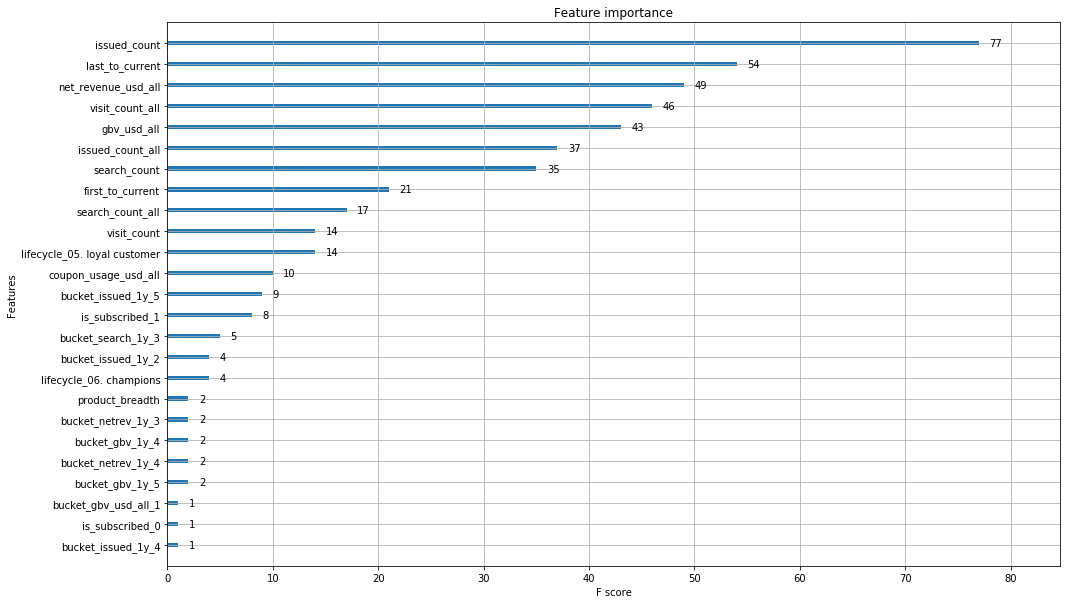

In [194]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# plot feature importance
plt.rcParams["figure.figsize"] = (16, 10)
plot_importance(model)
plt.show()

The graph shows that issued count, last issued month, net revenue, visit count contribute most to the champions stage. The Visit one is interesting because we can increase our champions customer by attract them first to visit our platform

# Prediction

#### XGBoost

In [186]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [187]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# fit model on all training data
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = xgboost.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy: %.2f%%" % (accuracy * 100.0))

XGBoost Accuracy: 86.11%


#### Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [189]:
def logreg_fit(x_train, y_train):
    logreg = LogisticRegression()

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001]}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 5,
                                    n_iter = 5, n_jobs=-1, random_state = 123)
    
    random_logreg.fit(x_train, y_train)
    
    print ("Best Accuracy", random_logreg.score(x_train, y_train))
    print ("Best Param", random_logreg.best_params_)
    
    return random_logreg

In [190]:
best_logreg = logreg_fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Accuracy 0.8583079214240125
Best Param {'C': 10}


In [209]:
logreg = LogisticRegression(C=best_logreg.best_params_.get('C'))
logreg.fit(X_train, y_train)

print("logistic Regression accuracy: %.2f%%" % (logreg.score(X_test,y_test)*100))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logistic Regression accuracy: 86.19%


1. Prediction score from XGBoost and Logistic regression are good (86%), this means we can predict only by using customer lifecycle table 
2. By using this predictions, we can predict how many customers that will become or still in Champions stage for the next month. This would be useful for budgeting Marketing Campaign, as we know champions customers don't have to targeted in display campaign because they will buy anyway.